In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [27]:
def evaluate_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")

def generate_graphic_prediction(y_test, y_pred, model_name):
    plt.figure(figsize=(12, 6))

    # Linha dos valores reais
    plt.plot(y_test.index, y_test.values, label='Valores Reais', linewidth=2)

    # Linha das previsões (usa o mesmo índice do y_test!)
    plt.plot(y_test.index, y_pred, label='Valores Preditos', linewidth=2)

    plt.xlabel('Tempo')
    plt.ylabel('Vazão')
    plt.title(f'Previsão x Real - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
df = pd.read_parquet('../data_lake/processed/dados_processados_3936.0_2025-11-22.parquet')
df.columns

Index(['vazao', 'precipitacao', 'temp_media', 'umidade_relativa',
       'codigo_bacia', 'codigo_sub_bacia', 'co_estacao', 'latitude',
       'longitude', 'cidade', 'estado', 'rio', 'vazao_t1', 'umidade_t1',
       'vazao_roll3_mean', 'vazao_roll6_mean', 'vazao_roll9_mean',
       'precipitacao_roll3_mean', 'precipitacao_roll6_mean',
       'precipitacao_roll9_mean', 'umidade_relativa_roll3_mean',
       'umidade_relativa_roll6_mean', 'umidade_relativa_roll9_mean', 'mes',
       'mes_sin', 'mes_cos', 'estacao_inverno', 'estacao_outono',
       'estacao_primavera', 'estacao_verao'],
      dtype='object')

In [29]:
target = "vazao"

features = [
    'precipitacao', 'temp_media', 'umidade_relativa',
    'vazao_t1', 'umidade_t1',
    'vazao_roll3_mean', 'vazao_roll6_mean', 'vazao_roll9_mean',
    'precipitacao_roll3_mean', 'precipitacao_roll6_mean', 'precipitacao_roll9_mean',
    'umidade_relativa_roll3_mean', 'umidade_relativa_roll6_mean', 'umidade_relativa_roll9_mean',
    'mes', 'mes_sin', 'mes_cos',
    'estacao_inverno', 'estacao_outono', 'estacao_primavera', 'estacao_verao'
]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [30]:
y_test.index

DatetimeIndex(['2009-06-17', '2009-06-18', '2009-06-19', '2009-06-20',
               '2009-06-21', '2009-06-22', '2009-06-23', '2009-06-24',
               '2009-06-25', '2009-06-26',
               ...
               '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24',
               '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28',
               '2011-04-29', '2011-04-30'],
              dtype='datetime64[ns]', name='data', length=683, freq=None)

MAE: 0.887
MSE: 2.091
RMSE: 1.446
R²: 0.946


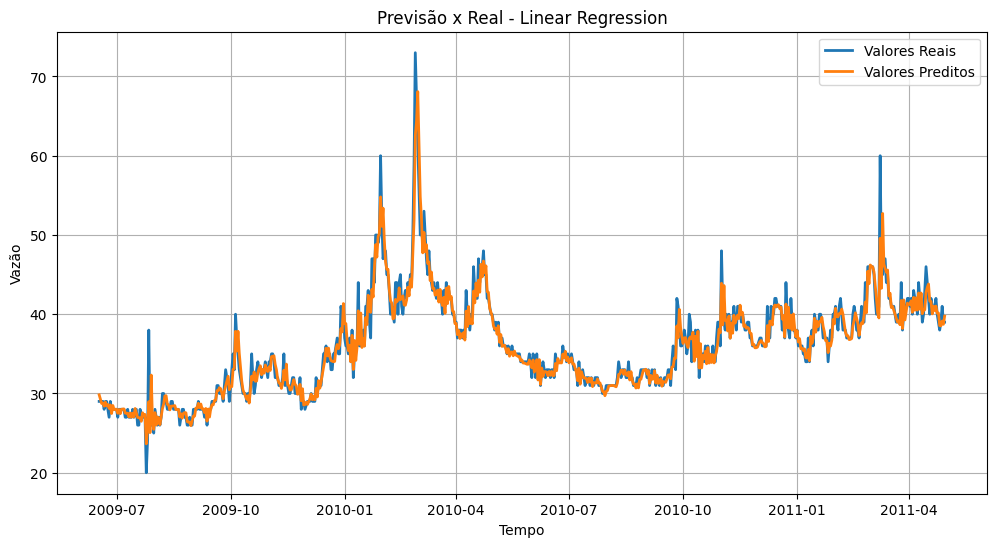

MAE: 2.203
MSE: 11.916
RMSE: 3.452
R²: 0.693


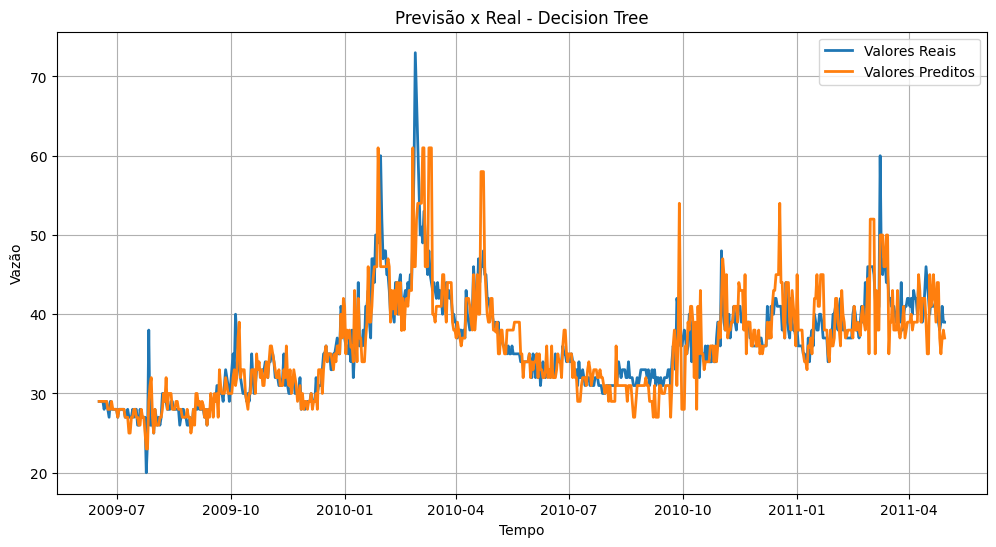

MAE: 1.132
MSE: 4.458
RMSE: 2.111
R²: 0.885


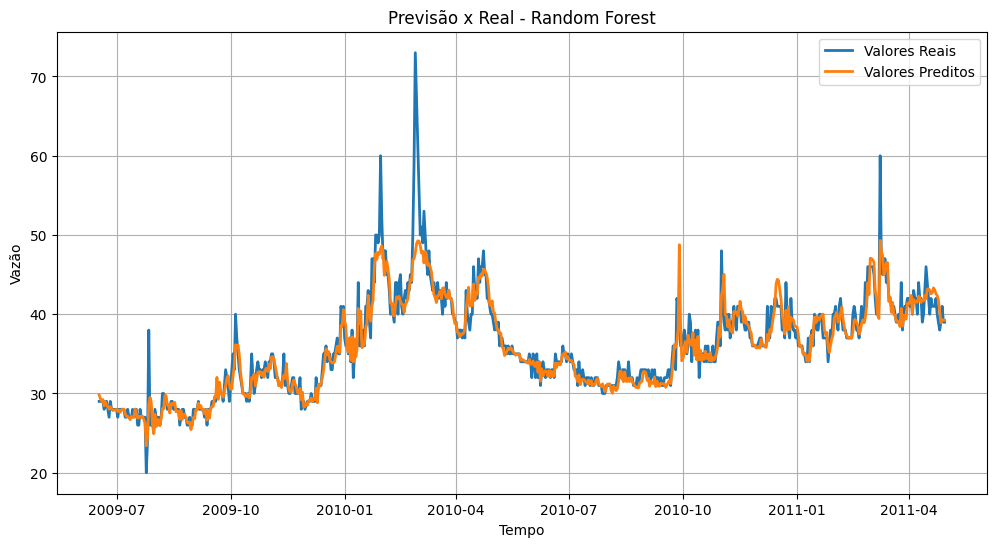

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3207
[LightGBM] [Info] Number of data points in the train set: 2728, number of used features: 21
[LightGBM] [Info] Start training from score 31.957562
MAE: 1.368
MSE: 5.252
RMSE: 2.292
R²: 0.865


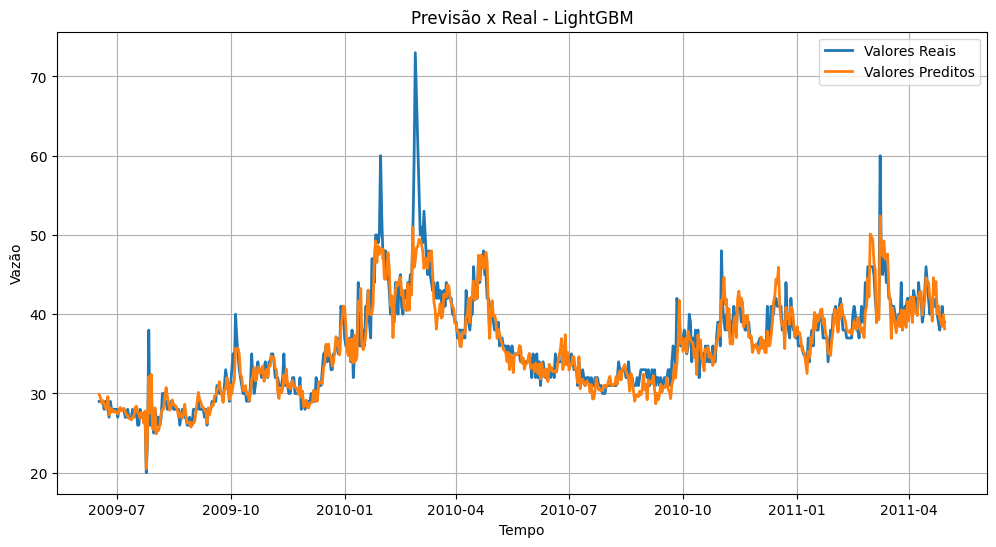

MAE: 1.368
MSE: 5.586
RMSE: 2.364
R²: 0.856


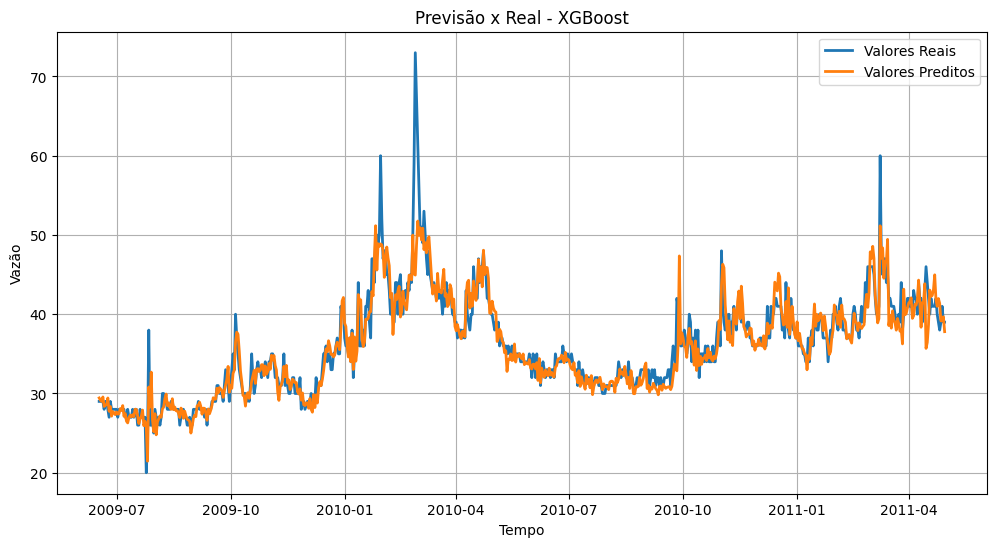

In [31]:
lin_reg = LinearRegression()
dec_tree = DecisionTreeRegressor(random_state=19)
ran_forest = RandomForestRegressor(random_state=19, n_estimators=500)
lgbm = LGBMRegressor(random_state=19, n_estimators=500)
xgb = XGBRegressor(random_state=19, n_estimators=500)

models_list = [
    ("Linear Regression", lin_reg),
    ("Decision Tree", dec_tree),
    ("Random Forest", ran_forest),
    ("LightGBM", lgbm),
    ("XGBoost", xgb)
]

results = []

for name, model in models_list:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    evaluate_metrics(y_test, preds)

    generate_graphic_prediction(y_test, preds, name)


## Interpretação das Métricas de Regressão
### 1. MAE — Mean Absolute Error (Erro Absoluto Médio)

**O que é:**

A média da diferença absoluta entre o valor real e o valor previsto.

**Interpretação:**

- Mostra em média quantas unidades o modelo erra.

- Tem interpretação direta: se MAE = 5, o modelo erra ~5 m³/s por dia.

- Não dá peso maior para erros grandes — todos erros têm a mesma importância.

**Bom para:**

- Quando queremos uma métrica fácil de entender e robusta.

### 2. MSE — Mean Squared Error (Erro Quadrático Médio)

**O que é:**

A média dos quadrados dos erros.

**Interpretação:**

- Penaliza muito mais erros grandes.

- Útil quando os outliers importam.

**Desvantagem:**

- Como é quadrático, a unidade não é mais m³/s, mas (m³/s)².

- Por isso geralmente preferimos o RMSE.

### 3. RMSE — Root Mean Squared Error (Raiz do Erro Quadrático Médio)

**O que é:**

A raiz quadrada do MSE.

**Interpretação:**

- Tem a mesma unidade da variável prevista (m³/s).

- Penaliza fortemente erros grandes.

- Quanto menor, melhor (igual ao MAE).

- É considerada a melhor métrica geral para séries temporais de vazão.

### 4. R² — Coeficiente de Determinação

**O que é:**

Mede quanto da variação da variável y o modelo explica.

**Interpretação:**

Vai de −∞ até 1.

- 1.0 → previsão perfeita

- 0.7 → o modelo explica 70% da variação

- 0.0 → o modelo não é melhor que prever a média

- valor negativo = o modelo é pior do que prever a média

**Observação importante:**

R² pode ser enganoso em séries temporais — use apenas como complemento.

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   2.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   2.0s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=700; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   2.2s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   2.5s
[CV] END bootstrap=True, max_depth=10, max_features=0.3, min_samples_leaf=4, min_samples_split=20, n_estimators=700; total time=   

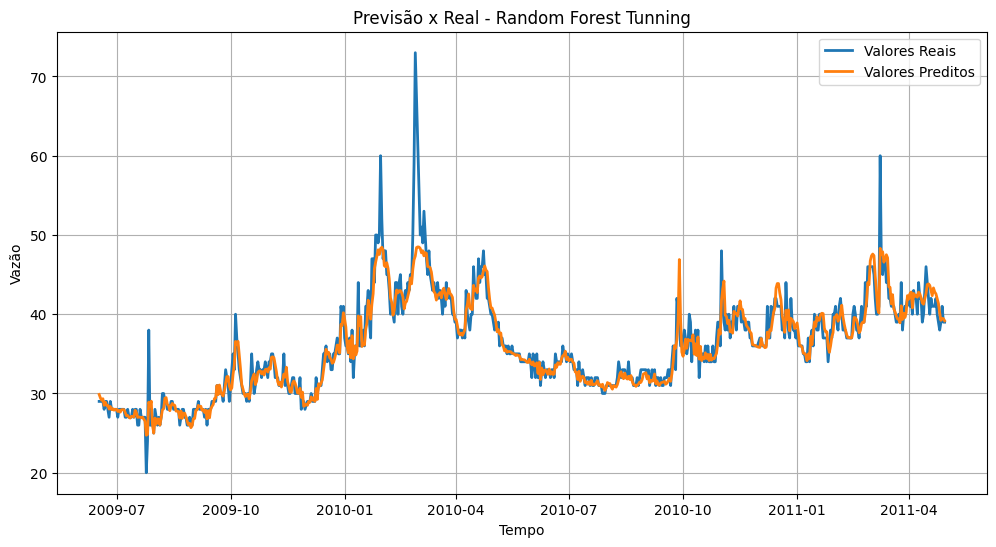

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir hiperparâmetros para busca
param_grid = {
    'n_estimators': [300, 500, 700, 900],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=19)

# Random Search
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=19,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_
print("Melhores hiperparâmetros encontrados:")
print(rf_random.best_params_)

# Avaliação
preds = best_rf.predict(X_test)

evaluate_metrics(y_test, preds)
generate_graphic_prediction(y_test, preds, 'Random Forest Tunning')


In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ======================================
# 1) Normalizar os dados
# ======================================

df_teste = df.copy()
df_teste.drop(columns=['codigo_bacia', 'codigo_sub_bacia', 'co_estacao', 'latitude', 'longitude', 'cidade', 'estado', 'rio'], inplace=True)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_teste)

# Converte de volta para dataframe com mesmos nomes
df_scaled = pd.DataFrame(data_scaled, index=df_teste.index, columns=df_teste.columns)

# ======================================
# 2) Criar janelas temporais
# ======================================

def create_lstm_dataset(data, target_col="vazao", window=30):
    X, y = [], []
    target_idx = data.columns.get_loc(target_col)

    for i in range(window, len(data)):
        X.append(data.iloc[i-window:i].values)  # 30 dias anteriores
        y.append(data.iloc[i, target_idx])      # prever hoje
    
    return np.array(X), np.array(y)

WINDOW = 30
X_lstm, y_lstm = create_lstm_dataset(df_scaled, window=WINDOW)

# ======================================
# 3) Separar treino e teste
# ======================================

split = int(len(X_lstm) * 0.8)

X_train = X_lstm[:split]
y_train = y_lstm[:split]
X_test = X_lstm[split:]
y_test = y_lstm[split:]

# ======================================
# 4) Criar modelo LSTM
# ======================================

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(WINDOW, X_lstm.shape[2])),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# ======================================
# 5) Treinar com EarlyStopping
# ======================================

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ======================================
# 6) Fazer previsões
# ======================================

y_pred_scaled = model.predict(X_test)

# Desnormalizar
def inverse_scale(value):
    m = df_teste['vazao'].values.reshape(-1, 1)
    scaler_y = MinMaxScaler().fit(m)
    return scaler_y.inverse_transform(value)

y_test_real = inverse_scale(y_test.reshape(-1,1)).flatten()
y_pred_real = inverse_scale(y_pred_scaled).flatten()

# ======================================
# 7) Métricas
# ======================================

evaluate_metrics(y_test=y_test_real, y_pred=y_pred_real)


Epoch 1/100


/home/julia/Documents/ufsc/previsao-vazão-chuva/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0076 - val_loss: 0.0019
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0017 - val_lo

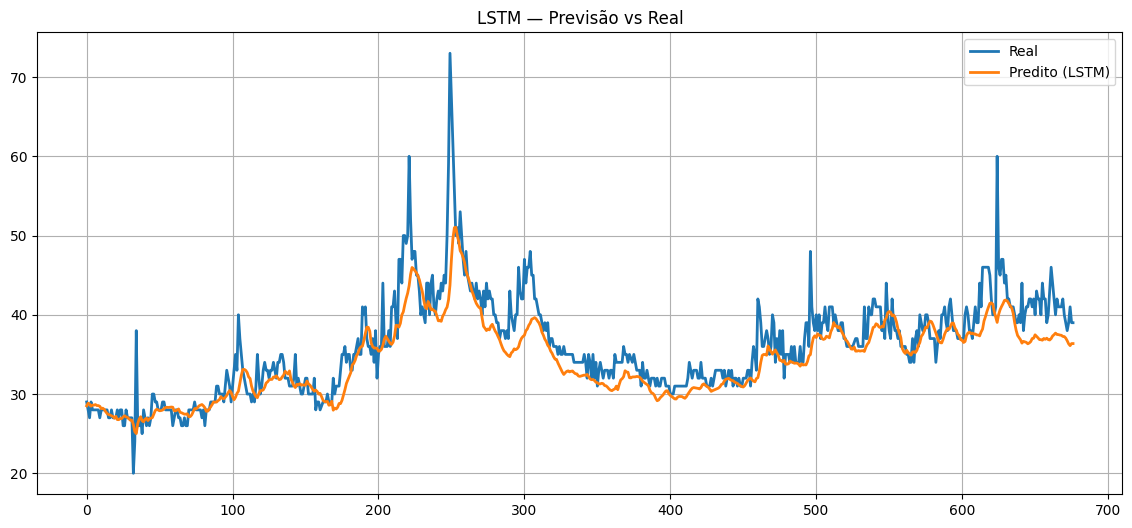

In [40]:
plt.figure(figsize=(14,6))
plt.plot(y_test_real, label="Real", linewidth=2)
plt.plot(y_pred_real, label="Predito (LSTM)", linewidth=2)
plt.legend()
plt.title("LSTM — Previsão vs Real")
plt.grid(True)
plt.show()